In [32]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from wordcloud import WordCloud
import ast

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

import nltk
from ast import literal_eval
from datetime import timedelta
import string
import statistics
import itertools

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import sys
sys.path.append('../')
import Variables as vr

In [33]:
# create loader object
L = instaloader.Instaloader()
LIST_ALL_USERS = vr.LIST_ALL_USERS

nltk.download('stopwords')
nltk.download('punkt')


USE_LOCAL_DA = True

if (not USE_LOCAL_DA):
    
    # MongoDB Database
    instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
    instagram_db = instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

else:

    # MongoDB Database
    Local_instagramClient = pymongo.MongoClient('127.0.0.1:27017',authSource='Instagram')
    instagram_db = Local_instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load impersonator posts

In [34]:
# impersonator
_limit = 10000
df_impersonator =  pd.DataFrame(list(instagram_col_impersonator.find({
            "$or":
            [
                {'similarity_username': { '$gt': 0.15 }},
                {'similarity_full_name': { '$gt': 0.15 }},
                {'similarity_biography': { '$gt': 0.15 }},
                {'similarity_photo' : True },
            ]    
    
}).limit(_limit) ))
df_impersonator.shape[0]

1825

In [36]:
# post
_limit = 10000
df_post =  pd.DataFrame(list(instagram_col_post.find({}).limit(_limit) ))
df_post.shape[0]

8262

In [37]:
# df_impersonator = pd.read_csv('Dataset/impersonator_list.csv', encoding = 'unicode_escape')
# df_impersonator.shape[0]

In [38]:
# df_post = pd.read_csv('Dataset/post_data.csv')
# df_post.shape[0]

# convert list represantion to real list - problem with csv load

In [39]:
# def convert_representations_to_real_list(_row):
    
#     _row['post_caption_hashtags'] = ast.literal_eval(_row['post_caption_hashtags'])
#     _row['post_caption_mentions'] = ast.literal_eval(_row['post_caption_mentions'])
#     _row['post_tagged_users'] = ast.literal_eval(_row['post_tagged_users'])

#     return _row

In [40]:
# df_post = df_post.apply(convert_representations_to_real_list, axis=1)

# get dataframes

In [41]:
# politician
df_post_trump = df_post.loc[( df_post['associated_username'] == vr.DONALD_TRUMP ) ] 
df_post_obama = df_post.loc[( df_post['associated_username'] == vr.BARACK_OBAMA ) ]
df_post_macron = df_post.loc[( df_post['associated_username'] == vr.EMMANUEL_MACRON ) ]
df_post_johnson = df_post.loc[( df_post['associated_username'] == vr.BORIS_JOHNSON ) ]
df_post_may = df_post.loc[( df_post['associated_username'] == vr.THERESA_MAY ) ]

# sport player
df_post_cristiano_ronalod = df_post.loc[( df_post['associated_username'] == vr.CRISTIANO_RONALDO ) ] 
df_post_leo_messi = df_post.loc[( df_post['associated_username'] == vr.LEOMESSI ) ]
df_post_roger_federer = df_post.loc[( df_post['associated_username'] == vr.ROGER_FEDERER ) ]
df_post_rafael_nadal = df_post.loc[( df_post['associated_username'] == vr.RAFAEL_NADAL ) ]
df_post_djokovic = df_post.loc[( df_post['associated_username'] == vr.NOVAK_DJOKOVIC ) ]

#singers
df_post_lady_gaga = df_post.loc[( df_post['associated_username'] == vr.LADY_GAGA )] 
df_post_beyonce = df_post.loc[( df_post['associated_username'] == vr.BEYONCE ) ] 
df_post_taylor_swift = df_post.loc[( df_post['associated_username'] == vr.TAYLOR_SWIFT ) ] 
df_post_adele = df_post.loc[( df_post['associated_username'] == vr.ADELE ) ] 
df_post_madonna = df_post.loc[( df_post['associated_username'] == vr.MADONNA ) ] 

# Calculate mean

In [42]:
list_all_usecases = [
    df_post_trump, df_post_obama, df_post_macron, df_post_johnson, df_post_may,
    df_post_cristiano_ronalod, df_post_leo_messi, df_post_rafael_nadal, df_post_roger_federer, df_post_djokovic,
    df_post_lady_gaga, df_post_beyonce, df_post_taylor_swift, df_post_adele, df_post_madonna,
]

In [44]:
# average comment
print("avg comment per post")
print("======")

counter = 1
for item in list_all_usecases:
    if (item.shape[0] != 0):
        print( item['associated_hashtag'].iloc[0] + ": " + str(item['post_comments'].mean()))
        
    if (counter % 5 == 0):
        print("======")
    counter +=1

avg comment per post
donaldtrump: 27.141768292682926
barackobama: 40.00645161290323
emmanuelmacron: 12.455696202531646
borisjohnson: 11.785714285714286
theresamay: 2.215686274509804
cristianoronaldo: 12.168
leomessi: 13.080135440180587
rafaelnadal: 12.17269076305221
rogerfederer: 9.45398773006135
novakdjokovic: 6.675392670157068
ladygaga: 5.466529351184346
beyonce: 3.9209486166007905
taylorswift: 4.844498438042346
adele: 3.7676537585421412
madonna: 4.745519713261649


In [45]:
# average like
print("avg like per post")
print("======")

counter = 1
for item in list_all_usecases:
    if (item.shape[0] != 0):
        print( item['associated_hashtag'].iloc[0] + ": " + str(item['post_likes'].mean()))
    
    if (counter % 5 == 0):
        print("======")
    counter +=1

avg like per post
donaldtrump: 690.6021341463414
barackobama: 1488.3096774193548
emmanuelmacron: 302.26582278481015
borisjohnson: 274.14935064935065
theresamay: 54.254901960784316
cristianoronaldo: 1692.6746666666666
leomessi: 2866.32618510158
rafaelnadal: 768.8915662650602
rogerfederer: 670.1226993865031
novakdjokovic: 320.0523560209424
ladygaga: 219.36766220391348
beyonce: 353.84189723320156
taylorswift: 177.83894481082956
adele: 291.15945330296125
madonna: 134.247311827957


In [46]:
# average comment per impersonator
print("avg comment per impersonator")
print("======")

counter = 1
for item in list_all_usecases:
    if (item.shape[0] != 0):
        df_like_size = item.groupby('post_owner_id')['post_comments'].mean().reset_index(name='counts')
        df_like_size.columns = ['id', 'avg comment']
        print(item['associated_hashtag'].iloc[0] + ": " + str(df_like_size['avg comment'].mean()))
        
    if (counter % 5 == 0):
        print("======")
    counter +=1

avg comment per impersonator
donaldtrump: 27.615411040037902
barackobama: 38.79375
emmanuelmacron: 12.57222222222222
borisjohnson: 10.83655462184874
theresamay: 1.8833333333333335
cristianoronaldo: 12.292754071325497
leomessi: 12.806304068272159
rafaelnadal: 15.221875000000002
rogerfederer: 9.337037037037037
novakdjokovic: 6.712814932067009
ladygaga: 5.291571275946276
beyonce: 3.812698412698413
taylorswift: 4.619697572958442
adele: 3.7602484472049706
madonna: 5.53222222222222


In [47]:
# average like per impersonator
print("avg like per impersonator")
print("======")

counter = 1
for item in list_all_usecases:
    if (item.shape[0] != 0):
        df_like_size = item.groupby('post_owner_id')['post_likes'].mean().reset_index(name='counts')
        df_like_size.columns = ['id', 'avg like']
        print(item['associated_hashtag'].iloc[0] + ": " + str(df_like_size['avg like'].mean()))
        
    if (counter % 5 == 0):
        print("======")
    counter +=1

avg like per impersonator
donaldtrump: 703.4558872305139
barackobama: 1442.0999999999997
emmanuelmacron: 303.5180555555556
borisjohnson: 248.8064425770308
theresamay: 47.31666666666667
cristianoronaldo: 1574.7084518655947
leomessi: 2756.4744167770764
rafaelnadal: 908.3357638888889
rogerfederer: 632.8135802469136
novakdjokovic: 321.2792936288089
ladygaga: 209.19039224664235
beyonce: 337.42222222222216
taylorswift: 173.6192501942502
adele: 287.99371980676324
madonna: 163.14111111111106


# Dataframe - Communities

In [48]:
# df_politician.columns

In [49]:
df_politician = pd.concat([df_post_trump, df_post_obama, df_post_macron, df_post_johnson, df_post_may])
df_sportplayer = pd.concat([df_post_cristiano_ronalod, df_post_leo_messi, df_post_rafael_nadal, df_post_roger_federer, df_post_djokovic])
df_musician = pd.concat([df_post_lady_gaga, df_post_beyonce, df_post_taylor_swift, df_post_adele, df_post_madonna])

df_politician['community'] = 'politician'
df_sportplayer['community'] = 'sportplayer'
df_musician['community'] = 'musician'


print("politician: " + str(df_politician.shape[0]))
print("sportplayer: " + str(df_sportplayer.shape[0]))
print("musician: " + str(df_musician.shape[0]))

politician: 1095
sportplayer: 2239
musician: 4823


In [50]:
df_all_post = pd.concat([df_politician, df_sportplayer, df_musician])
df_all_post.shape[0]

8157

In [18]:
# df_musician['post_owner_similarity_username'].tolist()

In [19]:
# 
def plot_1():
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2,2, figsize=(11,10))
    
    ALL_DF = [df_politician, 
              df_sportplayer, 
              df_musician
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = item[['post_owner_similarity_username']].copy()
            ser = ser.sort_values(by='post_owner_similarity_username')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=axes[0][0], legend=False, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

#     ax.axes.set_xlim([0,1])
#     ax.axes.set_ylim([0.79,1.01])
    ax.set_ylabel("CDF")
    ax.set_xlabel("A) Username")
#     ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    
    
    counter = 0
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = item[['post_owner_similarity_full_name']].copy()
            ser = ser.sort_values(by='post_owner_similarity_full_name')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=axes[0][1], legend=False, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([0,1])
#     ax.axes.set_ylim([0.79,1.01])
#     ax.set_ylabel("CDF")
    ax.set_xlabel("B) Full Name")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    
    
    counter = 0
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = item[['post_owner_similarity_biography']].copy()
            ser = ser.sort_values(by='post_owner_similarity_biography')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=axes[1][0], legend=False, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([0,1])
#     ax.axes.set_ylim([0.79,1.01])
#     ax.set_ylabel("CDF")
    ax.set_xlabel("C) Bio")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    
    
    counter = 0
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = item[['post_owner_similarity_photo']].copy()
            ser = ser.sort_values(by='post_owner_similarity_photo')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=axes[1][1], legend=True, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([0,1])
#     ax.axes.set_ylim([0.79,1.01])
#     ax.set_ylabel("CDF")
    ax.set_xlabel("D) Photo")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
#     for ax in axes:
#         for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)

#     t = plt.suptitle('Similarity in Profile Features', fontsize=15)
    
    plt.savefig("plot_02distribution_P1.pdf", bbox_inches='tight')
    
plot_1()

In [20]:
# 
def plot_2():
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,3, figsize=(12,3))
    
    ALL_DF = [df_politician, 
              df_sportplayer, 
              df_musician
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = item[['post_comments']].copy()
            ser = ser.sort_values(by='post_comments')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes[0], legend=False, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

#     ax.axes.set_xlim([0,1])
#     ax.axes.set_ylim([0.79,1.01])
    ax.set_ylabel("CDF")
    ax.set_xlabel("A) Comments")
#     ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    
    
    counter = 0
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = item[['post_likes']].copy()
            ser = ser.sort_values(by='post_likes')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes[1], legend=False, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

#     ax.axes.set_xlim([0,1])
#     ax.axes.set_ylim([0.79,1.01])
#     ax.set_ylabel("CDF")
    ax.set_xlabel("B) Likes")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    
    
    
    counter = 0
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = item[['post_owner_mediacount']].copy()
            ser = ser.sort_values(by='post_owner_mediacount')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes[2], legend=True, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

#     ax.axes.set_xlim([0,1])
#     ax.axes.set_ylim([0.79,1.01])
#     ax.set_ylabel("CDF")
    ax.set_xlabel("C) Mediacount")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    

    
    for ax in axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)

#     t = plt.suptitle('Similarity in Profile Features', fontsize=15)
    
    plt.savefig("plot_02distribution_P2.pdf", bbox_inches='tight')
    
plot_2()

In [21]:
# wordcloud of hashtags
def get_wordcloud_plot(_df, _hashtag, _width, _height, _color):
    
    # all posts & all hashtags
    hashtag = _df["post_caption_hashtags"].tolist()
    hashtag = list(itertools.chain.from_iterable(hashtag))
    counter = collections.Counter(hashtag)
    
    for item in _hashtag:
        del counter[item]
    
    wordcloud = WordCloud(width = _width*100, height = _height*100, background_color="white", max_words=100, contour_width=3, colormap=_color).generate_from_frequencies(counter)
    plt.figure(figsize=[_width,_height]) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off")
    
    return plt

In [22]:
pll = get_wordcloud_plot(df_politician, vr.HASHTAG_POLITICIAN, 11, 4, "gist_gray_r")
pll.savefig('plot_02distribution_P3.pdf',bbox_inches='tight')

In [23]:
#  Colormap #f56d25 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, 
#     BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r,
#     PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, 
#     PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, 
#     Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,
#     YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
#     cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, 
#     gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, 
#     gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno,
#     inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, 
#     prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, 
#     tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, 
#     viridis_r, vlag, vlag_r, winter, winter_r

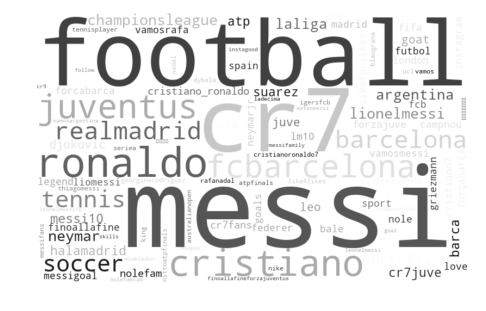

In [24]:
pll = get_wordcloud_plot(df_sportplayer, vr.HASHTAG_SPORT, 8, 5, "gist_gray_r")
pll.savefig('plot_02distribution_P3_1.pdf',bbox_inches='tight')

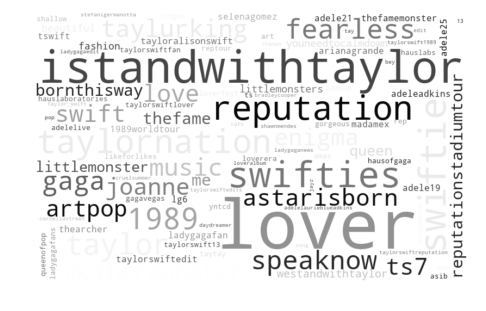

In [25]:
pll = get_wordcloud_plot(df_musician, vr.HASHTAG_MUSICIAN, 8, 5, "gist_gray_r")
pll.savefig('plot_02distribution_P3_2.pdf',bbox_inches='tight')

In [26]:
# total comment received
def plot_4():
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,2, figsize=(11,4))
    
    ALL_DF = [df_politician, 
              df_sportplayer, 
              df_musician
             ]
    
    # comment
    counter = 0
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(item['post_comments'].tolist())
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes[0], legend=False, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([1,500])
    ax.axes.set_ylim([0.3,1.01])
    ax.set_ylabel("CDF")
    ax.set_xlabel("a) Active Engagement")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    
    
    # like
    counter = 0
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(item['post_likes'].tolist())
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes[1], legend=True, label=vr.NAME_COMMUNITIES[counter], c=vr.COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([1,10000])
#     ax.axes.set_ylim([0.3,1.01])
#     ax.set_ylabel("CDF")
    ax.set_xlabel("b) Passive Engagement")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    t = plt.suptitle('Audience Engagement', fontsize=15)
    
    for ax in axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_02distribution_P4.pdf", bbox_inches='tight')
    
plot_4()

In [27]:
df_politician.columns

Index(['_id', 'associated_hashtag', 'associated_username',
       'post_associated_hashtag', 'post_associated_username', 'post_caption',
       'post_caption_hashtags', 'post_caption_mentions', 'post_comments',
       'post_date_utc', 'post_is_video', 'post_likes', 'post_location',
       'post_mediaid', 'post_owener_external_url',
       'post_owener_profile_pic_url', 'post_owner_biography',
       'post_owner_external_url', 'post_owner_followees',
       'post_owner_followers', 'post_owner_full_name', 'post_owner_id',
       'post_owner_is_private', 'post_owner_is_verified',
       'post_owner_mediacount', 'post_owner_profile_pic_url',
       'post_owner_similarity_biography', 'post_owner_similarity_full_name',
       'post_owner_similarity_photo', 'post_owner_similarity_username',
       'post_owner_username', 'post_shortcode', 'post_tagged_users',
       'post_thumbnail', 'post_typename', 'post_url', 'post_video_url',
       'post_viewer_has_liked', 'community'],
      dtype='objec

In [28]:
def plot_5():
    fig, axes = plt.subplots(1,1, figsize=(6,5))

    
    ALL_DF = [df_politician, 
              df_sportplayer, 
              df_musician
             ]
    
    list_markers = [
        "h" , "X" , "v" , "o"
    ]
    
    counter = 0
    for item in ALL_DF:
        
#         cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#         markers = {"mega": "s", "macro": "X"}
        ax = sns.scatterplot(x="post_comments", y="post_likes", s=35, alpha=0.9, label=vr.NAME_COMMUNITIES[counter], color=vr.COLORS_COMMUNITIES[counter], ax=axes, data=item)

        ax.set_xscale('log')
        ax.set_yscale('log')
        
#         ax.set_xlim(0,150)
        
#         ax.set_title(LIST_NAME_INFLUENCER[counter])
        
        counter += 1

    ax.set_xlabel("Comment")
    ax.set_ylabel("Like")
    
    ax.axes.set_xlim([1,1000])
    ax.axes.set_ylim([1,90000])
#     for ax in axes:

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)

    plt.savefig('plot_02distribution_P5.pdf',bbox_inches='tight')
    
plot_5()

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

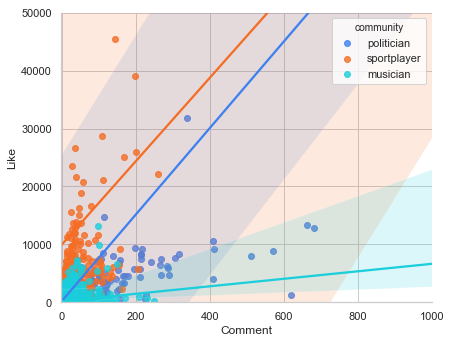

In [31]:
def plot_6():
    
    plt.figure()

    list_markers = [
        "h" , "X" , "v" , "o"
    ]
    
    ax = sns.lmplot(
        y="post_likes", 
        x="post_comments", 
         hue="community",
        data=df_all_post,  
        height=5, aspect=1.2, 
#         logistic=True, 
        x_jitter=2,
        palette={'politician':vr.COLOR_POLITICIAN, 'sportplayer': vr.COLOR_SPORTSARTS, 'musician': vr.COLOR_MUSICIAN},
        legend_out = False,
    )

    ax.set(ylim=(-1, 50000))
    ax.set(xlim=(-1, 1000))
    
#     ax.set(xscale="log", yscale="log")


    ax.set(xlabel='Comment', ylabel='Like')


#     for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)

    plt.savefig('plot_02distribution_P6.pdf',bbox_inches='tight')
    
plot_6()